<a href="https://colab.research.google.com/github/mgamboa4/proygmb/blob/main/Presentaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis y tendencias de patrones para identificar comportamientos en la sociedad


In [260]:
path = 'https://raw.githubusercontent.com/mgamboa4/proygmb/main/depression_data%20project.csv'

In [261]:
import pandas as pd
import numpy as np

In [262]:
df = pd.read_csv(path)
df.head()

,Name,Age,Marital status,Education level,Number of children,Smoking status,Physical activity level,Employment status,Annual income in uds,Alcohol consumption,Dietary habits,History of mental illness,History of substance abuse,Family history of depression,Chronic medical conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Yes,No,Yes,Yes


#Descripción de la base de datos

Esta base de información es un conjunto de datos que contiene aspectos relevantes sobre individuos con diversos atributos relacionados con sus factores personales, de estilo de vida y socioeconómicos. Todo esto con el fin de identificar patrones en los comportamientos de la sociedad. Originalmente estos datos es para ver comportamientos con tendencia a la depresión, sin embargo no es la única cosa que se puede proponer hipótesis o hasta conclusiones acerca de dicha base de datos.

#Descripción de las variables

El conjunto de datos incluye las siguientes características:

- Nombre: Nombre completo de la persona física. (Texto)
- Edad: Edad en años de cada persona. Numerico (Numerica)
- Estado civil: Soltero, casado, divorciado o viudo. (Categorica)
- Nivel educativo: Nivel más alto de educación alcanzado. (Categorica)
- Número de hijos: Número de hijos que tiene el individuo. (Numerica)
- Estado de tabaquismo: Fumador, exfumador o no fumador. (categorica)
- Nivel de actividad física: Sedentario, moderado o activo. (Categorica)
- Situación laboral: Empleado o desempleado. (categorica)
- Ingresos: Ingresos anuales en USD. (Numerica)
- Consumo de alcohol: Bajo, moderado o alto. (categorica)
- Hábitos dietéticos: Saludables, moderados o no saludables.(categorica)
- Historia de enfermedad mental: Sí o No. (categorica)
- Historial de abuso de sustancias: Sí o No. (categorica)
- Antecedentes familiares de depresión: Sí o No. (categorica)
- Condiciones médicas crónicas: Sí o No. (categorica)

In [263]:
df.isnull().any()

,0
Name,False
Age,False
Marital status,False
Education level,False
Number of children,False
Smoking status,False
Physical activity level,False
Employment status,False
Annual income in uds,False
Alcohol consumption,False


In [264]:
df.isnull().any(axis = 1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
21009,False
21010,False
21011,False
21012,False


In [265]:
df.isnull().sum(axis = 1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
21009,0
21010,0
21011,0
21012,0


Podemos observar que nuestra base de datos no tiene ningun dato o celda en blanco

#Preguntas de investigación

In [266]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

## 1. ¿Qué porcentaje ocupa el estado civil en promedio según los datos?

In [267]:
estado_civil_counts = df['Marital status'].value_counts()
total = estado_civil_counts.sum()
porcentajes = (estado_civil_counts / total) * 100
porcentajes

,count
Marital status,
Married,58.256400
Single,17.445513
Widowed,16.384315
Divorced,7.913772


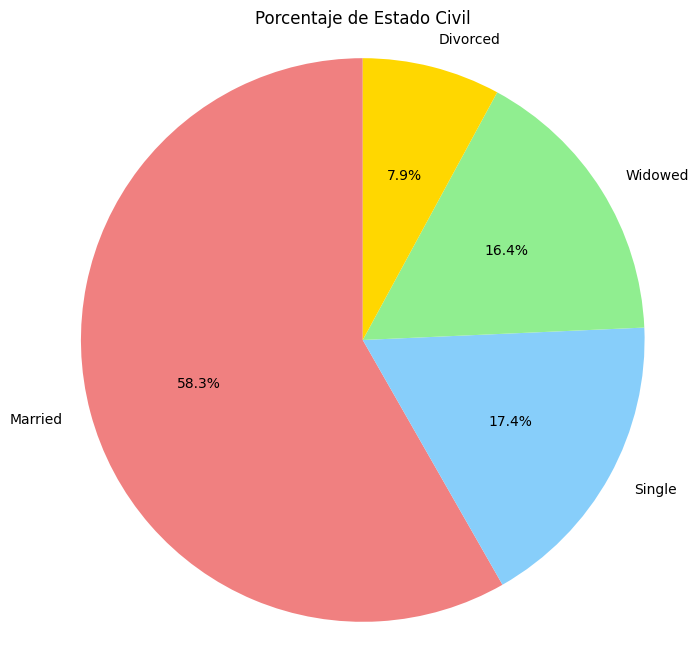

In [268]:
plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
plt.title('Porcentaje de Estado Civil')
plt.axis('equal')
plt.show()


Respuesta: En base al gráfico logré observar que el mayor porcentaje del estado civil son las personas casadas ocupando un 58.3% y el menor porcentaje fueron las personas divorciadas con un 7.9%

## 2. ¿Cuál es la relación entre el consumo de alcohol y el historial de enfermedad mental?


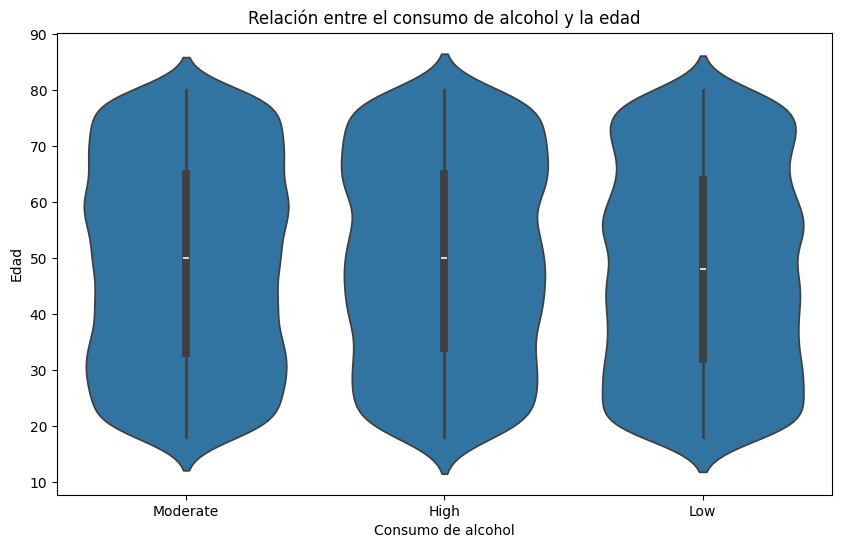

In [269]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Alcohol consumption', y='Age', data=df)
plt.title('Relación entre el consumo de alcohol y la edad')
plt.xlabel('Consumo de alcohol')
plt.ylabel('Edad')
plt.show()


En base al gráfico anterior logré identificar que la distribución en cada categoría es notablemente similar, con medias aproximadamente en la cuarta década de vida, lo que indica que la edad de los consumidores no varía significativamente en función del nivel de consumo de alcohol.

## 3. ¿Cómo varía la proporción de personas con enfermedades entre fumadores y no fumadores?

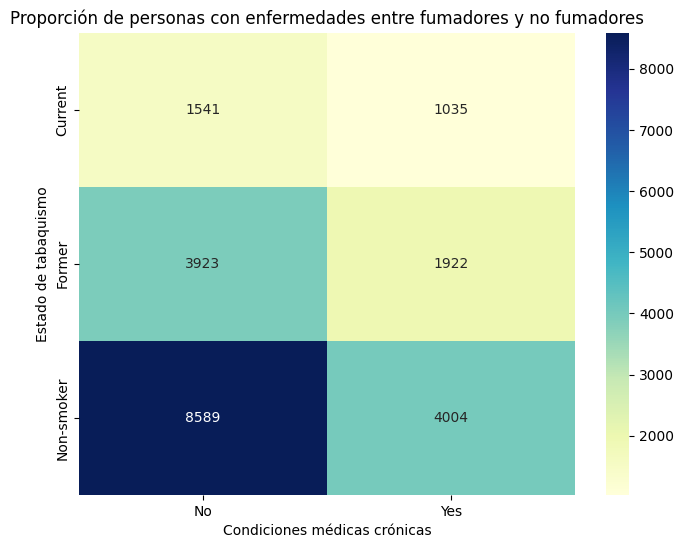

In [270]:
contingency_table = pd.crosstab(df['Smoking status'], df['Chronic medical conditions'])
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Proporción de personas con enfermedades entre fumadores y no fumadores')
plt.xlabel('Condiciones médicas crónicas')
plt.ylabel('Estado de tabaquismo')
plt.show()


En este gráfico lo que se puede observar es la proporción de personas con enfermedades crónicas y si es que fuman o no, y aquí destacamos que las personas que no fuman tampoco sufren enfermedades son la relacion mas alta y como segundo relacion mas alta estan las que si fuman y tienen enfermedad

## 4. ¿Cómo afecta el estado civil al nivel de consumo de alcohol?

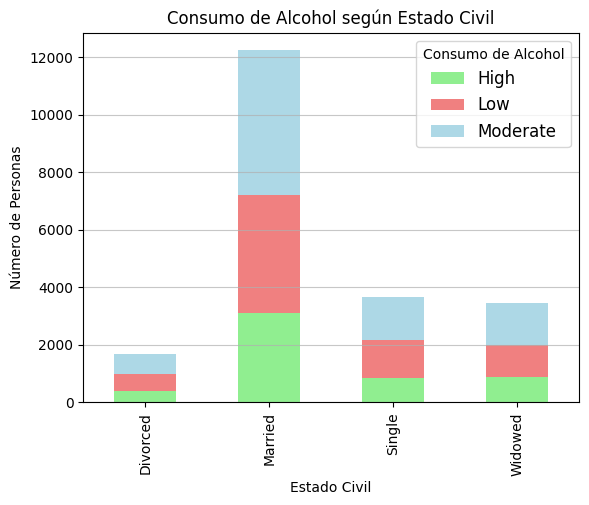

In [271]:
alcohol_vs_marital_status = pd.crosstab(df['Marital status'], df['Alcohol consumption'])

alcohol_vs_marital_status.plot(kind='bar', stacked=True,color=['lightgreen','lightcoral', 'lightblue'])
plt.title('Consumo de Alcohol según Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Personas')
plt.legend(title='Consumo de Alcohol', fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

En este grafico se puede observar como es que el estado civil de las personas podria afectar el consumo de alchol y la proporción mayor son las personas casadas y dentro de este rango se observa que toman alcohol moderadamente.

## 5. ¿Cómo varía la distribución de ingresos según el nivel educativo?


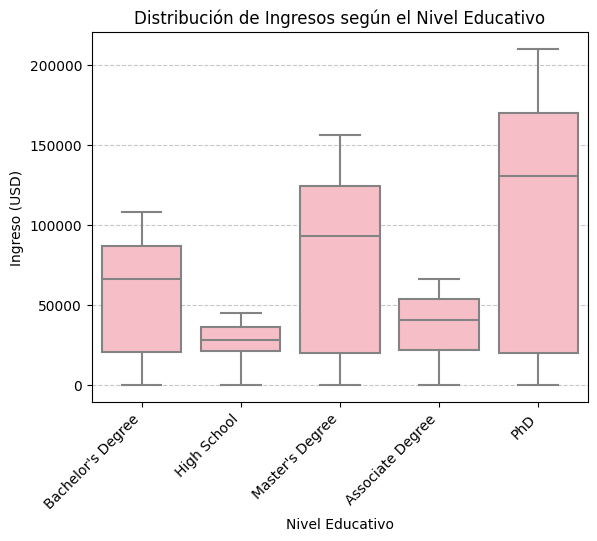

In [272]:
sns.boxplot(x='Education level', y='Annual income in uds', data=df,
            linewidth=1.5, color='lightpink')

plt.title('Distribución de Ingresos según el Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingreso (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Este box plot se hizo para ver si la eduación generaba una repercusión significativa en los ingresos anuales de las personas, y después de realizarlo se obtuvo que las personas con phd son las que mas dinero ganan, en cambio los que tienen el bachillerato son los que menos ganan, por ende si repercute direcatmente

## 6. ¿Cómo varía el ingreso promedio respecto a la edad?

In [273]:
avg_income_by_age = df.groupby('Age')['Annual income in uds'].mean()

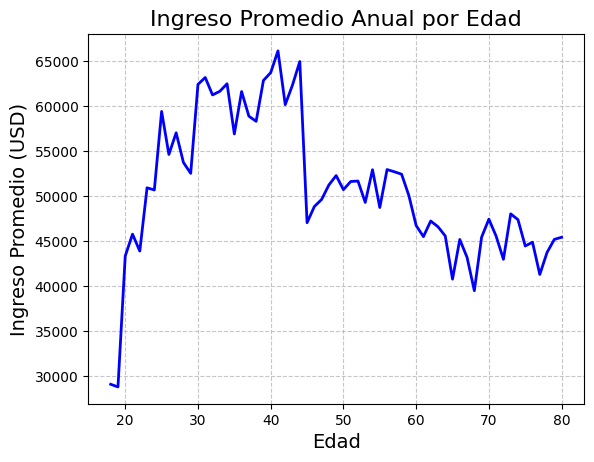

In [274]:
plt.plot(avg_income_by_age.index, avg_income_by_age.values,
         color='blue', linewidth=2)
plt.title('Ingreso Promedio Anual por Edad', fontsize=16)
plt.xlabel('Edad', fontsize=14)
plt.ylabel('Ingreso Promedio (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Esta grafica se hizo para ver el ingreso anual en promedio por persona según su edad, y por ende se logro observar que las personas de un rango entre 40-45 años son las que mas dinero ganan y en cambio las personas que tienen menos de 20 ańos son las que menos ganan.

## 7.¿Qué porcentaje de individuos tienen un historial de abuso de sustancias?

History of substance abuse
No     68.744646
Yes    31.255354
Name: proportion, dtype: float64


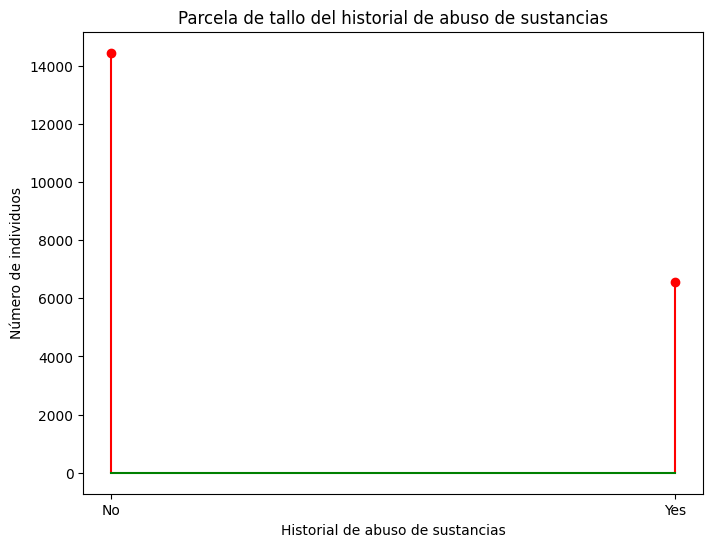

In [275]:
substance_abuse_percentage = (df['History of substance abuse'].value_counts(normalize=True) * 100)
print(substance_abuse_percentage)
plt.figure(figsize=(8, 6))
plt.stem(df['History of substance abuse'].value_counts().index, df['History of substance abuse'].value_counts().values,
         linefmt='r-', markerfmt='ro', basefmt='g-')
plt.xlabel('Historial de abuso de sustancias')
plt.ylabel('Número de individuos')
plt.title('Parcela de tallo del historial de abuso de sustancias')
plt.show()


Este grafico se hizo para ver que porcentaje de la población a estudiar tenia tendencia o habia abusado de suatncias. Arrojandonos que la gran mayoría no padecia con un 68.7%

## 8. ¿Cuál es el ingreso anual promedio por estado civil?

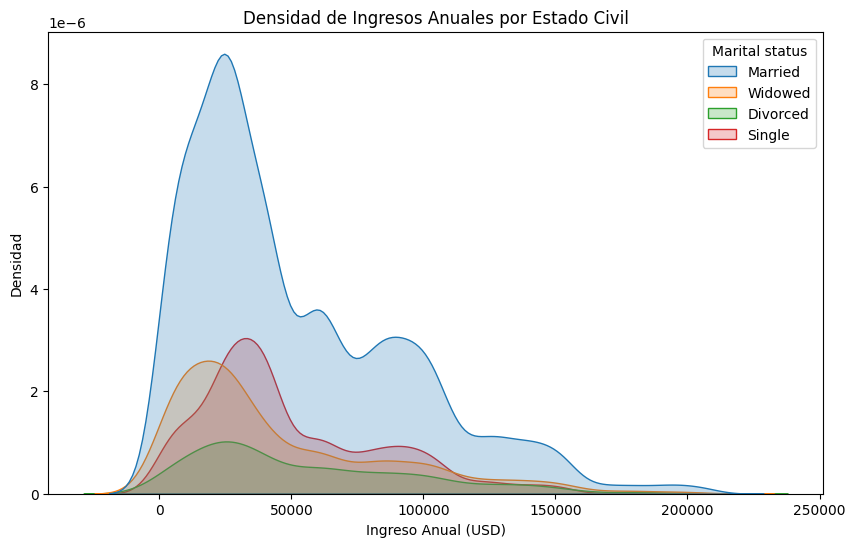

In [276]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Annual income in uds', hue='Marital status', fill=True)
plt.title('Densidad de Ingresos Anuales por Estado Civil')
plt.xlabel('Ingreso Anual (USD)')
plt.ylabel('Densidad')
plt.show()


En esta grafica se analizó el ingreso promedio de las personas según su estado civil, y se concluyó que las personas divorciadas son las que mas ganan en promedio y las que menos ingresos tienen son las viudas.

# Regresión

REGRESION NUMERICA

In [277]:
df = df.rename(columns={'Marital status': 'Marital_status',
                        'Education level': 'Education_level',
                        'Number of children': 'Number_of_children',
                        'Smoking status': 'Smoking_status',
                        'Physical activity level': 'Physical_activity_level',
                        'Employment status': 'Employment_status',
                        'Annual income in uds': 'Annual_income_in_uds',
                        'Alcohol consumption': 'Alcohol_consumption',
                        'Dietary habits': 'Dietary_habits',
                        'History of mental illness': 'History_of_mental_illness',
                        'History of substance abuse': 'History_of_substance_abuse',
                        'Family history of depression': 'Family_history_of_depression',
                        'Chronic medical conditions': 'Chronic_medical_conditions'})


In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import statsmodels.api as sm
from sklearn import linear_model

In [279]:
df.columns

Index(['Name', 'Age', 'Marital_status', 'Education_level',
       'Number_of_children', 'Smoking_status', 'Physical_activity_level',
       'Employment_status', 'Annual_income_in_uds', 'Alcohol_consumption',
       'Dietary_habits', 'History_of_mental_illness',
       'History_of_substance_abuse', 'Family_history_of_depression',
       'Chronic_medical_conditions'],
      dtype='object')

In [280]:
favs =['Annual_income_in_uds','Age','Number_of_children', 'Marital_status', 'History_of_mental_illness']
df = df[favs].dropna()
df.head(2)

,Annual_income_in_uds,Age,Number_of_children,Marital_status,History_of_mental_illness
0,26265.67,31,2,Married,Yes
1,42710.36,55,1,Married,Yes


In [281]:
modelA = sm.OLS.from_formula ('Age ~ Number_of_children',
                              data = df)
resultA = modelA.fit()
summary = resultA.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1523.
Date:                Fri, 06 Sep 2024   Prob (F-statistic):          9.29e-322
Time:                        15:44:30   Log-Likelihood:                -90009.
No. Observations:               21014   AIC:                         1.800e+05
Df Residuals:                   21012   BIC:                         1.800e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             44.0312      0.175    251.061      0.000      43.687      44.375
Number_of_children     3.8303      0.098     39.031      0.000       3.638       4.023
==============================================================================
Omnibus:                    15064.269   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1286.186
Skew:                           0.147   Prob(JB):                    5.11e-280
Kurtosis:                       1.824   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
resi = modelA.fit().resid
resi

,0
0,-20.691882
1,7.138467
2,30.138467
3,2.477770
4,-26.031185
...,...
21009,6.138467
21010,24.968815
21011,-12.031185
21012,-17.031185


In [283]:
reg_vals = resultA.fittedvalues.to_frame()
reg_vals

,0
0,51.691882
1,47.861533
2,47.861533
3,55.522230
4,44.031185
...,...
21009,47.861533
21010,44.031185
21011,44.031185
21012,44.031185


In [284]:
study = [df['Age'],df['Number_of_children'],resi,reg_vals]
study

[0        31
 1        55
 2        78
 3        58
 4        18
          ..
 21009    54
 21010    69
 21011    32
 21012    27
 21013    44
 Name: Age, Length: 21014, dtype: int64,
 0        2
 1        1
 2        1
 3        3
 4        0
         ..
 21009    1
 21010    0
 21011    0
 21012    0
 21013    4
 Name: Number_of_children, Length: 21014, dtype: int64,
 0       -20.691882
 1         7.138467
 2        30.138467
 3         2.477770
 4       -26.031185
            ...    
 21009     6.138467
 21010    24.968815
 21011   -12.031185
 21012   -17.031185
 21013   -15.352579
 Length: 21014, dtype: float64,
                0
 0      51.691882
 1      47.861533
 2      47.861533
 3      55.522230
 4      44.031185
 ...          ...
 21009  47.861533
 21010  44.031185
 21011  44.031185
 21012  44.031185
 21013  59.352579
 
 [21014 rows x 1 columns]]

In [285]:
study_table = pd.concat(study, axis = 1)
study_table

,Age,Number_of_children,0,0
0,31,2,-20.691882,51.691882
1,55,1,7.138467,47.861533
2,78,1,30.138467,47.861533
3,58,3,2.477770,55.522230
4,18,0,-26.031185,44.031185
...,...,...,...,...
21009,54,1,6.138467,47.861533
21010,69,0,24.968815,44.031185
21011,32,0,-12.031185,44.031185
21012,27,0,-17.031185,44.031185


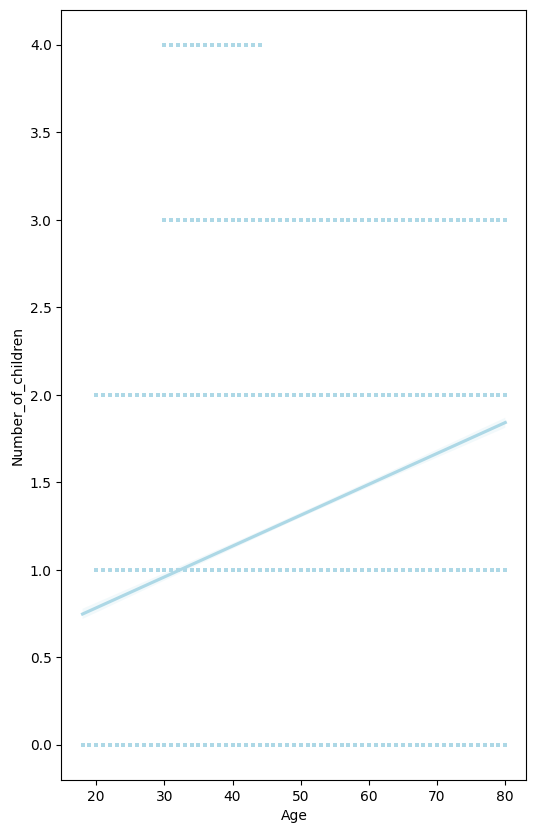

In [286]:
plt.figure(figsize=(6,10))
ax = sns.regplot(x = 'Age',
                 y = 'Number_of_children',
                 data = study_table,
                 color = 'lightblue',
                 marker = '+',
                 scatter_kws = {'s': 5}
)

En el gráfico se muestran las personas según la edad cuantos hijos tienen y se ven los valores ajustados en la linea de tendencia. Mostrandonos que la mayoría tiene de 1-2 hijos

REGRESION CATEGÓRICA

In [287]:
favs =['Annual_income_in_uds','Marital_status', 'History_of_mental_illness']

In [288]:
modelB = sm.OLS.from_formula ('Annual_income_in_uds~ Marital_status+History_of_mental_illness', data = df)
resultB = modelB.fit()
summary = resultB.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Annual_income_in_uds   R-squared:                       0.022
Model:                              OLS   Adj. R-squared:                  0.022
Method:                   Least Squares   F-statistic:                     116.9
Date:                  Fri, 06 Sep 2024   Prob (F-statistic):           8.48e-99
Time:                          15:44:33   Log-Likelihood:            -2.5259e+05
No. Observations:                 21014   AIC:                         5.052e+05
Df Residuals:                     21009   BIC:                         5.052e+05
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         5.932e+04   1001.869     59.208      0.000    5.74e+04    6.13e+04
Marital_status[T.Married]        -3937.0359   1050.278     -3.749      0.000   -5995.661   -1878.411
Marital_status[T.Single]         -6603.6607   1188.151     -5.558      0.000   -8932.529   -4274.793
Marital_status[T.Widowed]        -9242.9740   1200.191     -7.701      0.000   -1.16e+04   -6890.508
History_of_mental_illness[T.Yes] -1.183e+04    604.010    -19.588      0.000    -1.3e+04   -1.06e+04
==============================================================================
Omnibus:                     2983.819   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4425.300
Skew:                           1.064   Prob(JB):                         0.00
Kurtosis:                       3.723   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Ingreso anual = b0 + b1*0 + b1.1*1 - b2*1
# Ingreso anual = constante + Estado marital - Historial de enfermedad mental

In [289]:
m_modelb = 55780 -3925.8121*0 -6572.6413*1 -9535.1783*0 -11830*1

Cúal es el salario anual  en uds de una persona soltera y que cuenta con un historial sobre alguna enfermedad mental?

In [290]:
print ('salario anual en uds de una persona soltera con un historial sobre alguna enfermedad mental? \t' , m_modelb)

salario anual en uds de una persona soltera con un historial sobre alguna enfermedad mental? 	 37377.3587
